In [35]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import ipywidgets as widgets
from IPython import display

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
import sys
sys.path.append('/h/ashlie/jupyter_helpers')
import plot_helper as ph

import os

In [41]:
# time ms in msec, latency us in nsec.
base_path = '/h/ashlie/new-benchmark-check-qd/write'
queue_sizes = [
    'q1',
    'q2',
    'q4',
    'q8',
    'q16',
    'q32',
    'q64',
    'q128',
    'q256',
    'q512',
    'q1024',
    'q2048',
    'q4096',
]
latf = '_lat.log'

devs = {
    #'spdk',
    #'spdk_delay',
    'spdk_batch',
    #'spdk_delay_batch',
    #'spdk_optane',
    #'spdk_optane_delay',
    'spdk_optane_batch',
    #'spdk_optane_delay_batch',
    #'sync',
    #'sync_force_sync',
    #'sync_ramdisk',
}

blk_sizes = {
    512,
    1024,
    2048,
    4096,
}

files = {}

for qs in queue_sizes:
    for dev in devs:
        for bs in blk_sizes:
            files[str(bs) + ',' + dev + ',' + qs[1:]] = os.path.join(
                os.path.join(
                    os.path.join(
                        os.path.join(base_path, qs),
                        dev),
                    'bs' + str(bs)),
                latf)

# Total time in sec
total_time = 10
bytes_per_mb = 1024 ** 2

large_fig_dim = (15, 10.6)

In [42]:
data = {}
dfs = {}

In [60]:
for k, v in files.iteritems():
    bs, devQd = k.split(',', 1)
    if bs not in dfs:
        dfs[bs] = {}
        data[bs] = {}
    dfs[bs][devQd] = pd.read_csv(v, sep=',', names=['io num', 'latency (ns)', 'bs', 'current queue depth'])
    if devQd not in data:
        data[bs][devQd] = {}

    data[bs][devQd]['average latency (us)'] = dfs[bs][devQd]['latency (ns)'].mean() / 1000

In [61]:
datadict = {}
for bs in blk_sizes:
    datadict[str(bs)] = {
        'queue depth': [],
        'average latency (us)': [],
        'Device': []
    }

for bs, stuff in data.iteritems():
    for outer, outervals in stuff.iteritems():
        dev, qs = outer.split(',', 1)
        qs = int(qs)
        for k, v in outervals.iteritems():
            datadict[bs][k].append(v)
        if 'spdk' in dev:
            datadict[bs]['Device'].append(dev)
            dfs[bs][outer]['Device'] = dev
        elif 'sync' == dev:
            datadict[bs]['Device'].append('ext4')
            dfs[bs][outer]['Device'] = 'ext4'
        elif 'sync_force_sync' == dev:
            datadict[bs]['Device'].append('ext4 sync')
            dfs[bs][outer]['Device'] = 'ext4 sync'
        elif 'sync_ramdisk' == dev:
            datadict[bs]['Device'].append('ramdisk')
            dfs[bs][outer]['Device'] = 'ramdisk'
        datadict[bs]['queue depth'].append(qs)

#datadict
alldata = {}
for bs in blk_sizes:
    alldata[str(bs)] = pd.DataFrame(datadict[str(bs)])

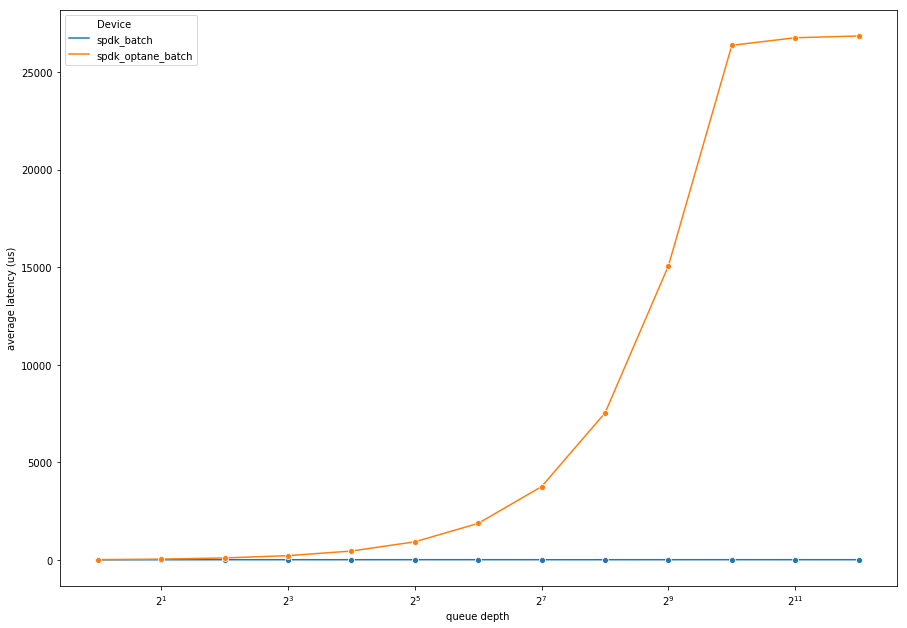

In [73]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata['512'], hue='Device', marker='o', ax=ax)
#ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)
#ax.set_yticks(range(10, 50, 5))
#fig.savefig('/h/ashlie/bench-orig.svg', bbox_inches='tight')

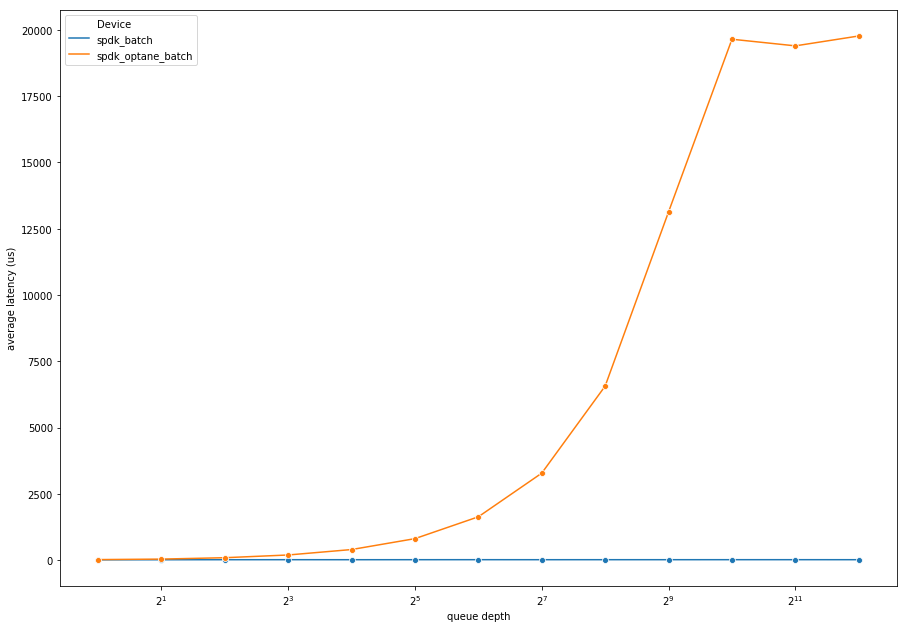

In [63]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata['1024'], hue='Device', marker='o', ax=ax)
#ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)
#ax.set_yticks(range(10, 50, 5))
#fig.savefig('/h/ashlie/bench-orig.svg', bbox_inches='tight')

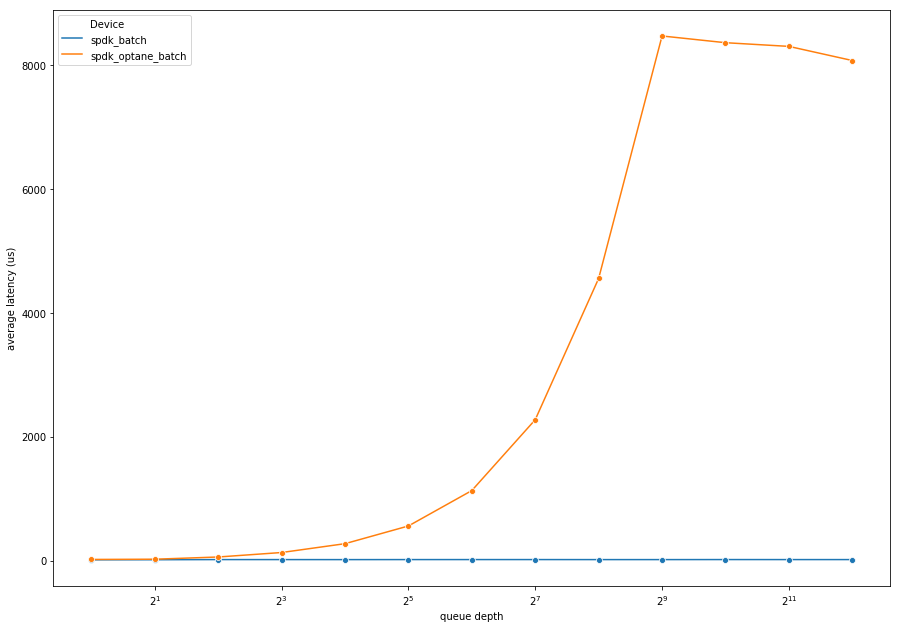

In [59]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata['2048'], hue='Device', marker='o', ax=ax)
#ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)
#ax.set_yticks(range(10, 50, 5))
#fig.savefig('/h/ashlie/bench-orig.svg', bbox_inches='tight')

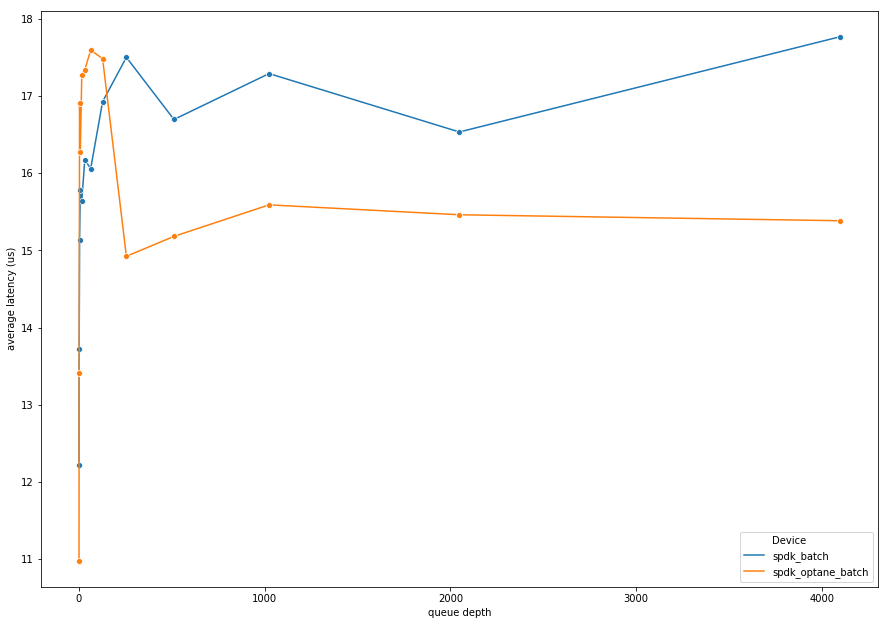

In [54]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata['4096'], hue='Device', marker='o', ax=ax)
#ax.set_xticks([2 ** x for x in range(0, 8)])
#ax.set_xscale('log', basex=2)
#ax.set_yticks(range(10, 50, 5))
#fig.savefig('/h/ashlie/bench-orig.svg', bbox_inches='tight')

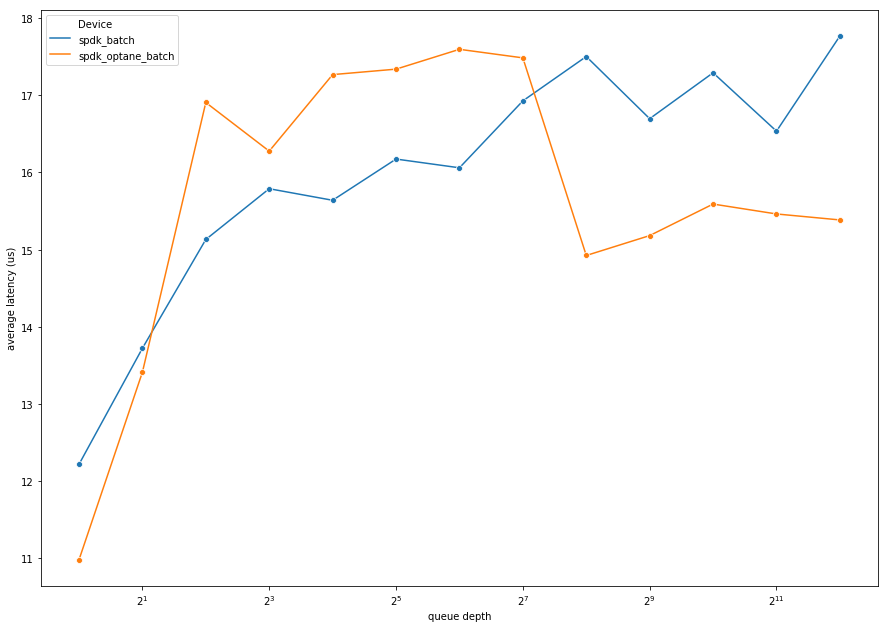

In [55]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata['4096'], hue='Device', marker='o', ax=ax)
#ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)
#ax.set_yticks(range(10, 50, 5))
#fig.savefig('/h/ashlie/bench-orig.svg', bbox_inches='tight')

In [88]:
# time ms in msec, latency us in nsec.
base_path3 = '/h/ashlie/new-benchmark-check-wat/write'
queue_sizes = [
    #'q1',
    #'q2',
    #'q4',
    #'q8',
    #'q16',
    #'q32',
    #'q64',
    #'q128',
    #'q256',
    #'q512',
    #'q1024',
    'q2048',
    'q4096',
]
latf = '_lat.log'

devs = {
    #'spdk',
    #'spdk_delay',
    #'spdk_batch',
    #'spdk_delay_batch',
    #'spdk_optane',
    #'spdk_optane_delay',
    'spdk_optane_batch',
    #'spdk_optane_delay_batch',
    #'sync',
    #'sync_force_sync',
    #'sync_ramdisk',
}

blk_sizes = {
    512,
    #1024,
    #2048,
    #4096,
}

files3 = {}

for qs in queue_sizes:
    for dev in devs:
        for bs in blk_sizes:
            files3[str(bs) + ',' + dev + ',' + qs[1:]] = os.path.join(
                os.path.join(
                    os.path.join(
                        os.path.join(base_path3, qs),
                        dev),
                    'bs' + str(bs)),
                latf)

# Total time in sec
total_time = 10
bytes_per_mb = 1024 ** 2

large_fig_dim = (15, 10.6)

In [89]:
data3 = {}
dfs3 = {}

In [90]:
for k, v in files3.iteritems():
    bs, devQd = k.split(',', 1)
    if bs not in dfs3:
        dfs3[bs] = {}
        data3[bs] = {}
    dfs3[bs][devQd] = pd.read_csv(v, sep=',', names=['io num', 'latency (ns)', 'bs', 'current queue depth'])
    if devQd not in data3:
        data3[bs][devQd] = {}

    data3[bs][devQd]['average latency (us)'] = dfs3[bs][devQd]['latency (ns)'].mean() / 1000

In [91]:
datadict3 = {}
for bs in blk_sizes:
    datadict3[str(bs)] = {
        'queue depth': [],
        'average latency (us)': [],
        'Device': []
    }

for bs, stuff in data3.iteritems():
    for outer, outervals in stuff.iteritems():
        dev, qs = outer.split(',', 1)
        qs = int(qs)
        for k, v in outervals.iteritems():
            datadict3[bs][k].append(v)
        if 'spdk' in dev:
            datadict3[bs]['Device'].append(dev)
            dfs3[bs][outer]['Device'] = dev
        elif 'sync' == dev:
            datadict3[bs]['Device'].append('ext4')
            dfs3[bs][outer]['Device'] = 'ext4'
        elif 'sync_force_sync' == dev:
            datadict3[bs]['Device'].append('ext4 sync')
            dfs3[bs][outer]['Device'] = 'ext4 sync'
        elif 'sync_ramdisk' == dev:
            datadict3[bs]['Device'].append('ramdisk')
            dfs3[bs][outer]['Device'] = 'ramdisk'
        datadict3[bs]['queue depth'].append(qs)

#datadict
alldata3 = {}
for bs in blk_sizes:
    alldata3[str(bs)] = pd.DataFrame(datadict3[str(bs)])

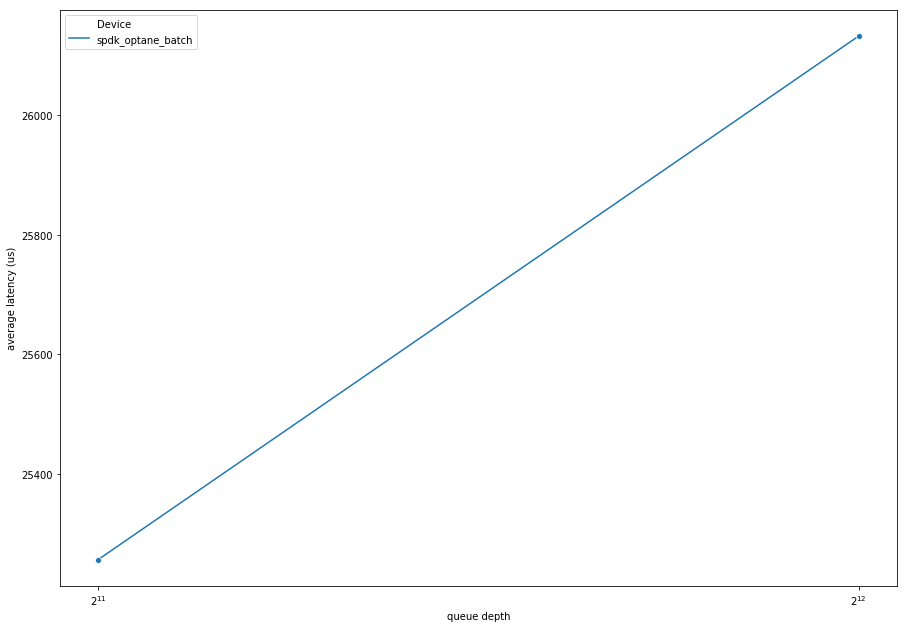

In [93]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata3['512'], hue='Device', marker='o', ax=ax)
#ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)
#ax.set_yticks(range(10, 50, 5))
#fig.savefig('/h/ashlie/bench-orig.svg', bbox_inches='tight')

In [31]:
qdData = pd.DataFrame()
for k, df in dfs.iteritems():
    qdData = qdData.append(df.sample(n=10000))

In [32]:
qdData.shape

(260000, 5)

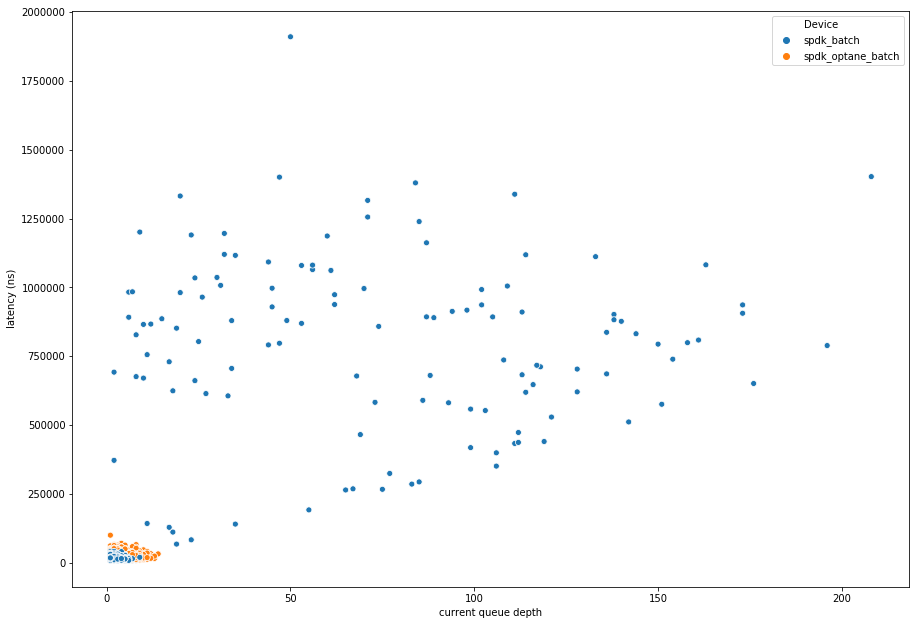

In [33]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.scatterplot(x='current queue depth', y='latency (ns)', data=qdData, hue='Device', ax=ax)

In [24]:
for k, df in dfs.iteritems():
    print 'for depth ' + k + ' the max depth is ' + str(df['current queue depth'].max())

for depth spdk_batch,2 the max depth is 2
for depth spdk_batch,1 the max depth is 1
for depth spdk_batch,4 the max depth is 4
for depth spdk_optane_batch,16 the max depth is 16
for depth spdk_batch,8 the max depth is 8
for depth spdk_optane_batch,32 the max depth is 18
for depth spdk_batch,16 the max depth is 16
for depth spdk_optane_batch,8 the max depth is 8
for depth spdk_optane_batch,4 the max depth is 4
for depth spdk_batch,32 the max depth is 32
for depth spdk_optane_batch,1 the max depth is 1
for depth spdk_optane_batch,2 the max depth is 2
for depth spdk_batch,2048 the max depth is 190
for depth spdk_batch,4096 the max depth is 250
for depth spdk_optane_batch,2048 the max depth is 17
for depth spdk_optane_batch,4096 the max depth is 16
for depth spdk_batch,256 the max depth is 225
for depth spdk_batch,1024 the max depth is 219
for depth spdk_optane_batch,256 the max depth is 17
for depth spdk_optane_batch,1024 the max depth is 16
for depth spdk_batch,64 the max depth is 64
for 